In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy.spatial.distance import euclidean

myseed = 10
random.seed(myseed)
np.random.seed(myseed)

In [14]:
def laplace(x, mu=0.5, b=0.5):
    return np.exp(-np.abs(x - mu) / b) / (2 * b)

def gaussian(x, mu=0, sigma=1):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

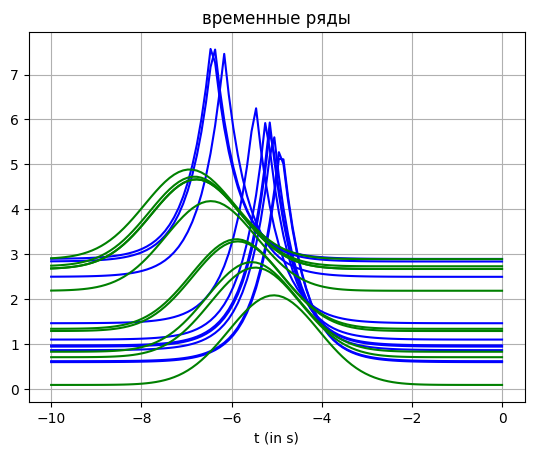

In [20]:
time_index = np.linspace(-10, 0, num=100)

tseries_list = []
arr_rand = np.random.random(size=20)

rand_const = np.random.randint(10, 20)
N = 10

for i in range(N):
    tseries_list.append(laplace(time_index + 2 * arr_rand[i] + 5) * 5 + arr_rand[i] * 3)
for i in range(N, 20):
   tseries_list.append(gaussian(time_index + 2 * arr_rand[i] + 5) * 5 + arr_rand[i] * 3)

for i in range(N):
    plt.plot(time_index, tseries_list[i], '-b')
for i in range(N, 20):
    plt.plot(time_index, tseries_list[i], '-g')

plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()

### Зашумление 

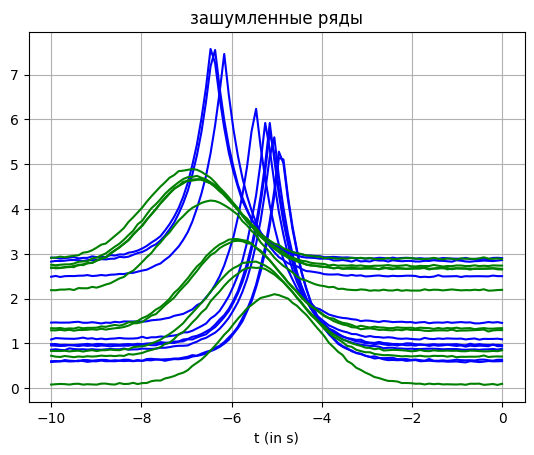

In [21]:
noise_std = 0.01 # Зашумление

for i in range(N):
    tseries_list[i] += np.random.normal(0, noise_std, size=len(time_index))
for i in range(N, 20):
    tseries_list[i] += np.random.normal(0, noise_std, size=len(time_index))

for i in range(N):
    plt.plot(time_index, tseries_list[i], '-b')
for i in range(N, 20):
    plt.plot(time_index, tseries_list[i], '-g')

plt.title(r'зашумленные ряды')
plt.xlabel(r't (in s)')
plt.grid()

In [23]:
def generate_candidates(Ti, min_len = 3, max_len = 100):
    candidates = []
    for l in range(min_len, max_len + 1):
        for i in range(len(Ti) - l + 1):
            subsequence = Ti[i:i + l]
            candidates.append(subsequence)
    return candidates

In [31]:
def distances_func(S, Wi_l):
    distances = [euclidean(S, candidate) for candidate in Wi_l]
    return distances

In [25]:
def candidates_func(DS):
    quality = np.mean(np.sqrt(DS))
    return quality

In [26]:
def insert_shapelet(rShapelets, shapelet):
    result = []
    i = 0
    for i in range(len(rShapelets)):
        if rShapelets[i][1] <= shapelet[1]:
            result += [rShapelets[i]]
        if rShapelets[i][1] > shapelet[1]:
            if i == 0 or rShapelets[i - 1][1] < shapelet[1]:
                result += [shapelet]
            else:
                result += [rShapelets[i - 1]]
    return result

In [27]:
def merge(k, kShapelets, shapelets):
    if len(kShapelets) == 0:
        return shapelets[0:k]
    result = kShapelets
    for shapelet in shapelets:
        if shapelet[1] < kShapelets[len(kShapelets) - 1][1]:
            kShapelets = insert_shapelet(result, shapelet)
    return result

In [28]:
def filter_shapelets(x, min = 0.05):
    result = []
    for xi in x:
        if xi[1] <= min:
            result += [xi]
    return result

In [32]:
def shapelet_selection(tseries_list, k = 50, min_len = 3, max_len = 100):
    kShapelets = []
    for tseries in tseries_list:
        shapelets = []
        for l in range(min_len, max_len + 1):
            candidates = generate_candidates(tseries, min_len, max_len)
            for candidate in candidates:
                distances = distances_func(candidate, candidates)
                quality = candidates_func(distances)
                shapelets.append((candidate, quality))
        shapelets = filter_shapelets(shapelets, quality)
        shapelets.sort(key=lambda x: x[1], reverse=True)
        kShapelets = merge(k, kShapelets, shapelets)
    return kShapelets

In [33]:
K_shapletes_laplace = shapelet_selection(tseries_list[0:10], k = 20, min_len= 4 , max_len= 4)
K_shapletes_gaussian = shapelet_selection(tseries_list[11:20], k = 20, min_len= 4 , max_len= 4)
print(K_shapletes_laplace)
print(K_shapletes_gaussian)

[(array([0.6069722 , 0.59884587, 0.60049862, 0.60429935]), 0.6749249572587016), (array([0.60210081, 0.60363934, 0.60111544, 0.61197275]), 0.674229102766969), (array([0.60492464, 0.61162597, 0.60239471, 0.61413637]), 0.6737680503871966), (array([0.60111544, 0.61197275, 0.60492464, 0.61162597]), 0.6735224444264166), (array([0.60159599, 0.60618765, 0.61413722, 0.60454532]), 0.6735080751269713), (array([0.61162597, 0.60239471, 0.61413637, 0.60918637]), 0.673332318551952), (array([0.61197275, 0.60492464, 0.61162597, 0.60239471]), 0.6731672964407678), (array([0.60363934, 0.60111544, 0.61197275, 0.60492464]), 0.6731138555548446)]
[(array([0.08307516, 0.09317357, 0.07282803, 0.09748417]), 0.7716840755859379), (array([0.1014726 , 0.07471332, 0.08307516, 0.09317357]), 0.7713362334366193), (array([0.08676171, 0.08094199, 0.11410449, 0.09272512]), 0.7713200904276646), (array([0.08205812, 0.08859274, 0.07538071, 0.09962935]), 0.7712261033807408), (array([0.10251248, 0.08676171, 0.08094199, 0.114104

In [52]:
import random

x = []
Y = []
shpletes_qual = K_shapletes_laplace + K_shapletes_gaussian

for i in range(len(shpletes_qual)):
    res = list(shpletes_qual[i][0]) + [shpletes_qual[i][1]]  
    x.append(res)
    
    if i < len(K_shapletes_gaussian):
        Y.append(1)
    else:
        Y.append(2)

X_train = []
X_test = []
Y_train = []
Y_test = []

indexes = np.arange(len(Y))
random.shuffle(indexes)
for i in range(int(len(Y) * 0.7)):
    X_train.append(x[indexes[i] - 1])
    Y_train.append(Y[indexes[i] - 1])

for i in range(int(len(Y) * 0.7), len(Y)):
    X_test.append(x[indexes[i] - 1])
    Y_test.append(Y[indexes[i] - 1])

Y_train, Y_test

([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1],
 [2, 1, 1, 1, 2, 2, 2, 1, 1])

In [53]:
from pyts.classification import TimeSeriesForest
   
clf = TimeSeriesForest(random_state=42)
clf.fit(X_train, Y_train)

print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    x_test_np = np.array(X_test[i]).reshape(1, -1)
    print(f"Вектор вероятности принадлежности к классам: {clf.predict_proba(x_test_np)}")
    print(f"Истинный класс для предсказаний: {Y_test[i]}")

Accuracy 0.6666666666666666
1 объект:
Вектор вероятности принадлежности к классам: [[0.332 0.668]]
Истинный класс для предсказаний: 2
2 объект:
Вектор вероятности принадлежности к классам: [[0.906 0.094]]
Истинный класс для предсказаний: 1
3 объект:
Вектор вероятности принадлежности к классам: [[0.758 0.242]]
Истинный класс для предсказаний: 1
4 объект:
Вектор вероятности принадлежности к классам: [[1. 0.]]
Истинный класс для предсказаний: 1
5 объект:
Вектор вероятности принадлежности к классам: [[0.87 0.13]]
Истинный класс для предсказаний: 2
6 объект:
Вектор вероятности принадлежности к классам: [[0.684 0.316]]
Истинный класс для предсказаний: 2
7 объект:
Вектор вероятности принадлежности к классам: [[0.828 0.172]]
Истинный класс для предсказаний: 2
8 объект:
Вектор вероятности принадлежности к классам: [[0.706 0.294]]
Истинный класс для предсказаний: 1
9 объект:
Вектор вероятности принадлежности к классам: [[0.998 0.002]]
Истинный класс для предсказаний: 1


### Итог: классификатор успешно справился с определением класса